# 逻辑回归

* 任务：二分类
* 输入：二维特征
* 标签：正类或者负类


### 1. 数据准备

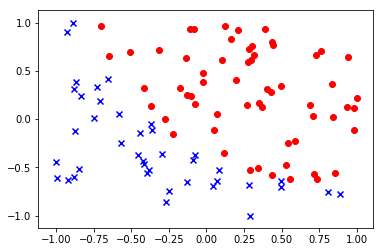

数据集大小: 100


In [1]:
import numpy as np
import matplotlib.pyplot as plt

lines = np.loadtxt('../input/data.csv', delimiter=',', dtype='str')
x_total = lines[:, 1:3].astype('float')
y_total = lines[:, 3].astype('float')

pos_index = np.where(y_total == 1)
neg_index = np.where(y_total == 0)
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.show()
print('数据集大小:', x_total.shape[0])

### 2. Sklearn

In [2]:
from sklearn import linear_model

lr_clf = linear_model.LogisticRegression()
lr_clf.fit(x_total, y_total)
print(lr_clf.coef_[0])
print(lr_clf.intercept_)

y_pred = lr_clf.predict(x_total)
print('accuracy:',(y_pred == y_total).mean())

[2.79739336 2.57559894]
[0.51625502]
accuracy: 0.89


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3. 梯度下降
$
\begin{aligned}
\frac{\partial}{\partial w_1} L(w,b) = \frac{1}{N}\sum_{i=1}^N (f(x^{(i)}) - y^{(i)}) x^{(i)}_1
\end{aligned}
$

$
\begin{aligned}
\frac{\partial}{\partial b} L(w,b)= \frac{1}{N}\sum_{i=1}^N f(x^{(i)}) - y^{(i)}
\end{aligned}
$

accuracy: 0.89


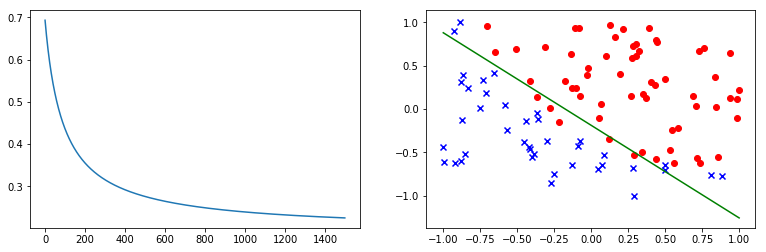

In [3]:
def sigmoid(z):
    result = 1 / (1 + np.exp(-z))
    return result

n_iterations = 1500
learning_rate = 0.1

weight = np.zeros(3)
x_total_concat = np.hstack([x_total, np.ones([x_total.shape[0], 1])])

loss_list = []
for i in range(n_iterations):
    prob_predict = sigmoid(np.dot(x_total_concat, weight))
    loss = (- y_total * np.log(prob_predict) - (1 - y_total) * (np.log(1 - prob_predict))).mean()
    loss_list.append(loss)
    
    w_gradient = (x_total_concat * np.tile((prob_predict - y_total).reshape([-1, 1]), 3)).mean(axis=0)
    weight = weight - learning_rate * w_gradient 
    
y_pred = np.where(np.dot(x_total_concat, weight)>0, 1, 0)
print('accuracy:',(y_pred == y_total).mean())

plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(np.arange(n_iterations), loss_list)
plt.subplot(122)
plot_x = np.linspace(-1.0, 1.0, 100)
plot_y = - (weight[0] * plot_x + weight[2]) / weight[1]
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.plot(plot_x, plot_y, c='g')
plt.show()
